In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import h5py
from netCDF4 import Dataset
import glob

import sqlite3

import matplotlib.pyplot as plt

/Users/sclayton/miniconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# import gridded particle positions

indir = '../data/particle_trajectories/'
mat = 'particle_for_SC.mat'
inmat = '%s%s'% (indir, mat)

part = h5py.File(inmat, 'r')
# part.keys()
# print np.array(part['parti']['x'])

In [3]:
# import model fields

files = glob.glob('../data/model_output/full*.cdf')

#for l in files:
model = Dataset(files[55], mode='r')
temp = np.squeeze(model.variables['temp'])
print np.shape(temp)

xc = model.variables['xc'][:]
yc = model.variables['yc'][:]
# other variables: rho, s 
# model.close()

(66, 322, 258)


In [4]:
# import trajectory data

indir = '../data/particle_trajectories/'
db = 'particles_forward.db'
indb = '%s%s'% (indir, db)

conn = sqlite3.connect(indb)
c = conn.cursor()

xy = pd.read_sql_query("select ID, DOY, x, y, z, temperature from particles;", conn)
# print xy

conn.close()


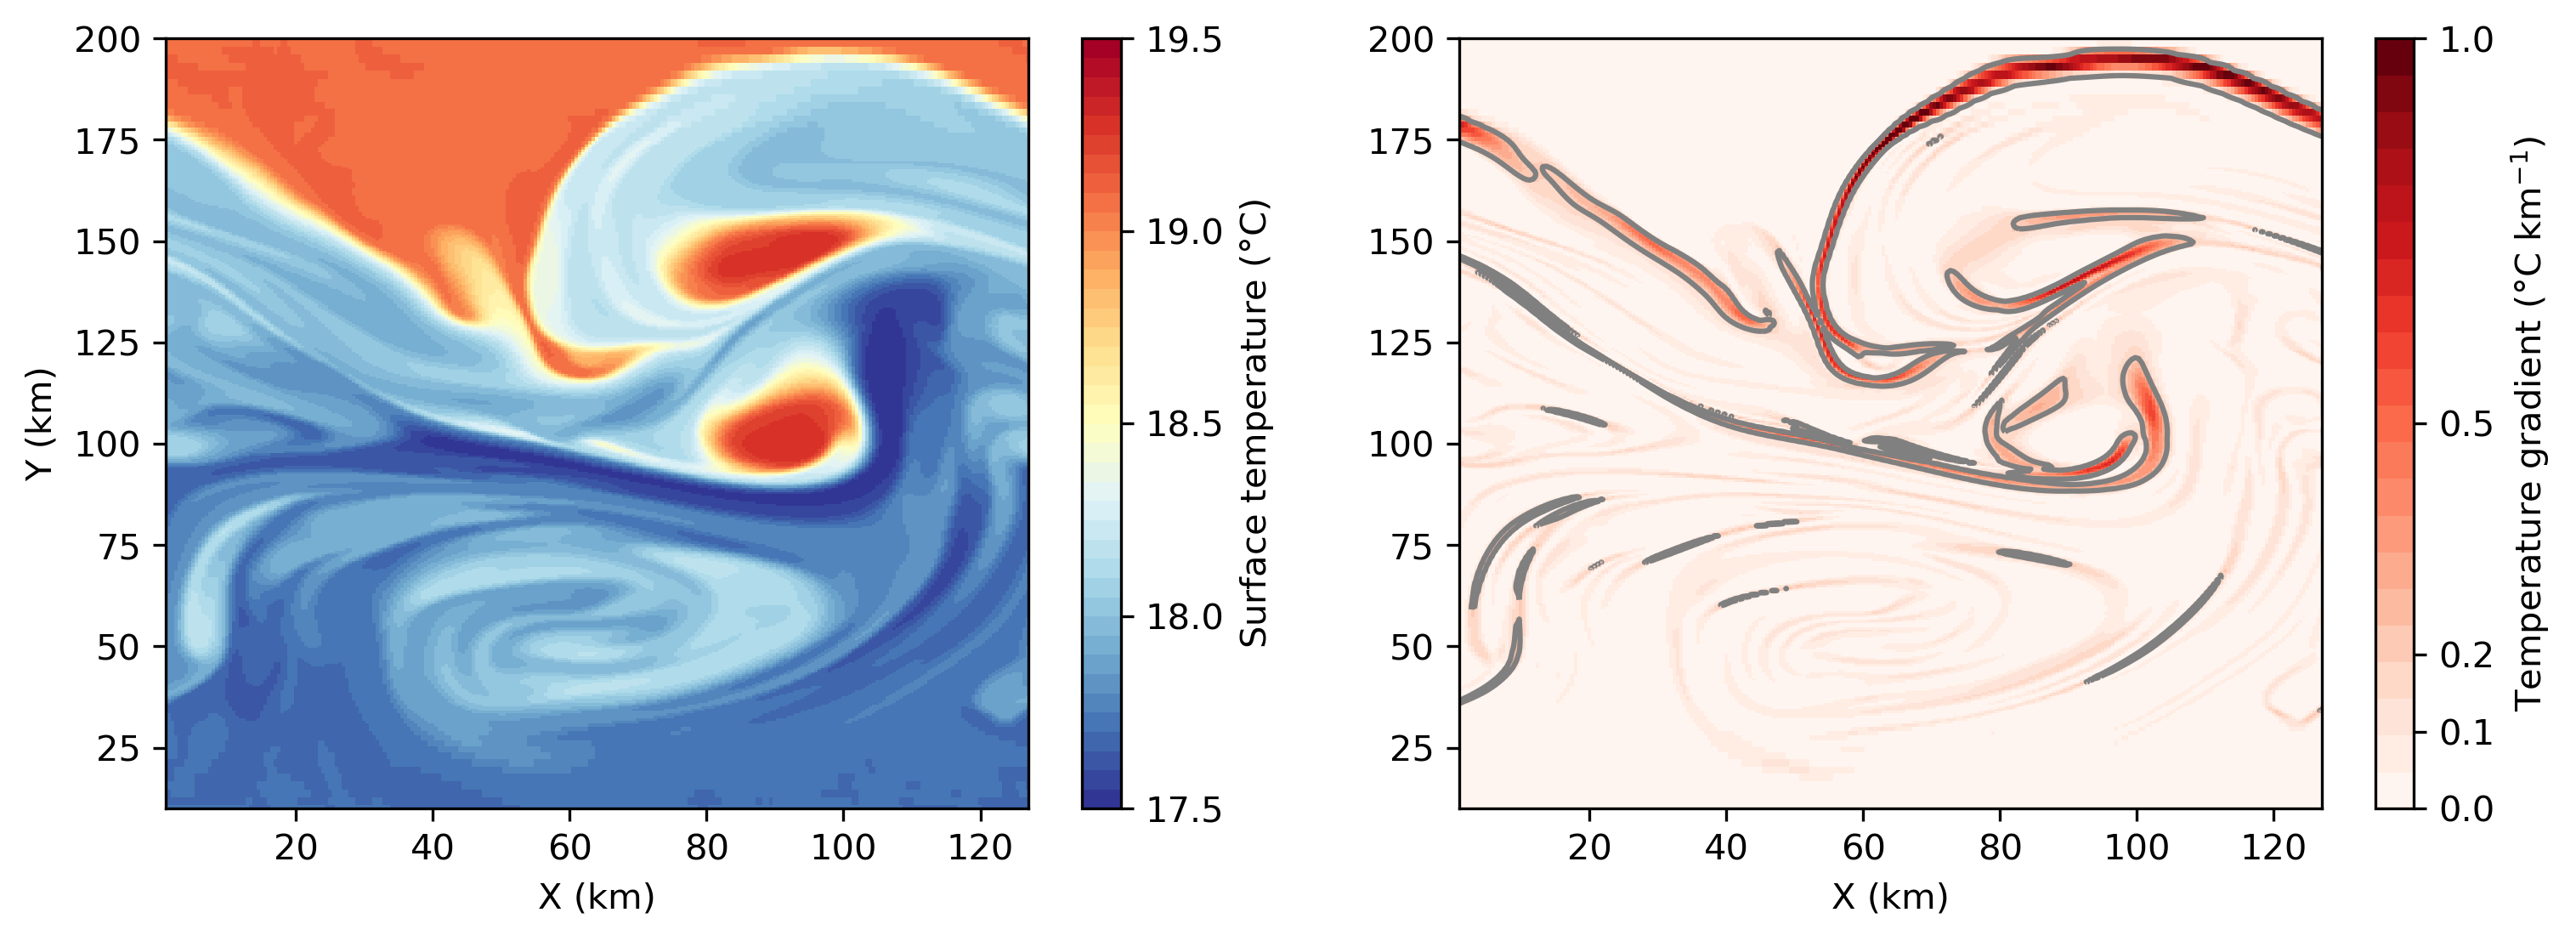

In [60]:
zl = 65

palette = plt.get_cmap('RdYlBu_r', 40)
palette2 = plt.get_cmap('Reds', 21)
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), dpi = 300)

tt = ax1.pcolor(xc, yc, temp[zl,:,:], vmin = 17.5, vmax = 19.5, cmap = palette)
cb1 = plt.colorbar(tt, ax = ax1, ticks = [17.5, 18., 18.5, 19., 19.5], label='Surface temperature ($\degree$C)')
# ax1.set_title('Temperature')
ax1.set_ylim([10,200])
ax1.set_xlim([1, 254/2])
ax1.set_xlabel('X (km)')
ax1.set_ylabel('Y (km)')

tgrad = (np.abs(np.diff(temp[zl,:,:], n=1, axis =0))/0.5)[1:321, 1:257] + (np.abs(np.diff(temp[zl,:,:], n=1, axis =1))/0.5)[1:321, 1:257]

gg = ax2.pcolor(xc[1:257], yc[1:321], tgrad, vmin = 0, vmax =1, cmap = palette2)
ax2.contour(xc[1:257], yc[1:321], tgrad,[0.2], colors = 'gray')
cb2 = plt.colorbar(gg, ax = ax2, ticks = [0, 0.1, 0.2, 0.5, 1], label='Temperature gradient ($\degree$C km$^{-1}$)')
# ax2.set_title('Temperature Gradient')
ax2.set_ylim([10,200])
ax2.set_xlim([1, 254/2])
ax2.set_xlabel('X (km)')

plt.show()

# plt.pcolor(xc, yc, np.diff(temp[zl,:,:]/0.5, n=1, axis = 0), vmin = -0.25, vmax = 0.25)
# plt.colorbar()
# plt.show()

# cbar = fig.colorbar(cax, ticks=[-1, 0, 1], orientation='horizontal')
# cbar.ax.set_xticklabels(['Low', 'Medium', 'High']) 